In [18]:
import geoplot as gplt
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import copy

%matplotlib inline


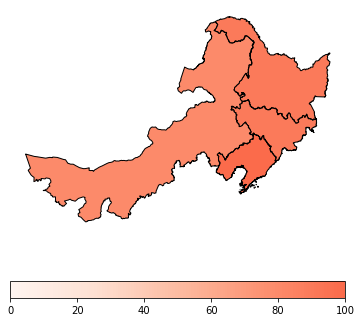

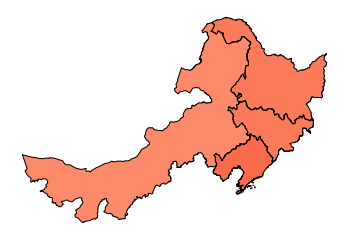

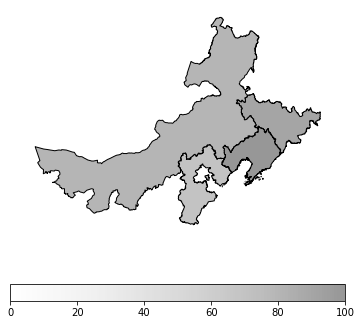

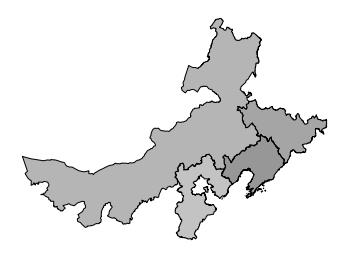

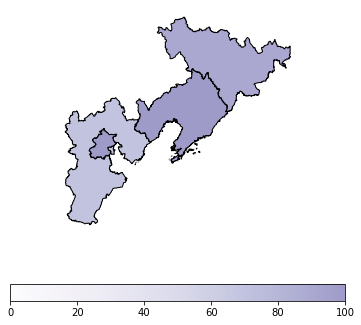

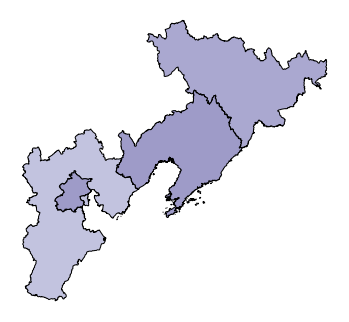

In [30]:
china = gpd.read_file('china-shapefiles/china.shp',
                     encoding='utf-8')
china = china.dissolve(by='OWNER').reset_index(drop=False)
albers_proj = '+proj=aea +lat_1=25 +lat_2=47 +lon_0=105'

df_used=pd.read_excel('data_used.xlsx')#read the province list
df_used_name= pd.DataFrame(df_used, columns=["ProvinceName1","ProvinceName2","ProvinceName3","ProvinceName4"])
df_used_EnglishName=pd.DataFrame(df_used, columns=["ProvinceEnglishName1","ProvinceEnglishName2","ProvinceEnglishName3","ProvinceEnglishName4"])
df_used_number=pd.DataFrame(df_used, columns=["Data1","Data2","Data3","Data4"])


def getFigure_narrow():
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='number',
                                                 cmap=trunc_cmap,
                                                 edgecolor='black',
                                                 vmin=0,
                                                 #vmax=1000,
                                                 legend=True,
                                                 legend_kwds={'orientation': "horizontal"}
                                                 )

    ax.plot()
    ax.axis('off')
    

    #fig2,ax2=plt.subplots()
    #cmap1 = copy.copy(trunc_cmap)
    #norm1 = mpl.colors.Normalize(vmin=0, vmax=data_with_geometry['number'].max())
    #im1 = mpl.cm.ScalarMappable(norm=norm1, cmap=cmap1)
    #cbar1 = fig.colorbar(
     #   im1, ax=ax, orientation='horizontal',
    #)

    #fig.colorbar(im1,ax=ax,orientation='horizontal')#把ax2的colorbar画在ax上
    
    figure_name=str(i+1)+"_narrow.png"# set figure name 
    plt.savefig(figure_name, dpi=500)
   
    
def getFigure_full():
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='number',
                                                 cmap=trunc_cmap,
                                                 edgecolor='black',
                                                 vmin=0,
                                                 #vmax=1000,
                                                 #legend=True,
                                                 #legend_kwds={'orientation': "horizontal"}
                                                 )

    ax.plot()
    #pic2=ax2.imshow(img,cmap=trunc_cmap,vmin=0,vmax=1000)#随意控制colorbar的范围
    ax.axis('off')
    figure_name=str(i+1)+"_full.png"# set figure name 
    plt.savefig(figure_name, dpi=500)
    #fig.colorbar(pic2,ax=ax,orientation='horizontal')#把ax2的colorbar画在ax上
    
for i in range(3):   
    df_now= pd.concat( [pd.DataFrame(df_used_name.values[i]), pd.DataFrame(df_used_EnglishName.values[i]), pd.DataFrame(df_used_number.values[i])], axis=1 )
    df_now.columns = ['provinceName', 'provinceEnglishName','number']# set the column
    data_with_geometry = pd.merge(left=df_now,
                              right=china,
                              left_on='provinceName',
                              right_on='OWNER',
                              how='left'
                              ).loc[:, ['provinceName',
                                        'provinceEnglishName',
                                        'number',
                                        'geometry'
                                        ]]
    data_with_geometry = gpd.GeoDataFrame(data_with_geometry, crs='EPSG:4326')
    
    splits = 1000# number of individual colours to use in full version 
    halfway = int(splits/2)# number of individual colours to use in truncated version

    if(i%6==0): #Cycle through colors
        colour_values = mpl.cm.Reds(np.linspace(0, 1, splits))# list of rgb colours for full version. Returns num evenly spaced samples, calculated over the interval [start, stop]
    elif(i%6==1):
        colour_values = mpl.cm.Greys(np.linspace(0, 1, splits))
    elif(i%6==2):
        colour_values = mpl.cm.Purples(np.linspace(0, 1, splits))
    elif(i%6==3):
        colour_values = mpl.cm.Blues(np.linspace(0, 1, splits))
    elif(i%6==4):
        colour_values = mpl.cm.Greens(np.linspace(0, 1, splits))
    elif(i%6==5):
        colour_values = mpl.cm.Oranges(np.linspace(0, 1, splits))
        
    trunc_colours = colour_values[0:halfway,:] # row 0 to halfway
    trunc_cmap = mpl.colors.ListedColormap(trunc_colours)
    full_colours = colour_values[:,:] # all rows, all columns
    full_cmap = mpl.colors.ListedColormap(full_colours)
    
    getFigure_narrow()
    getFigure_full()
    


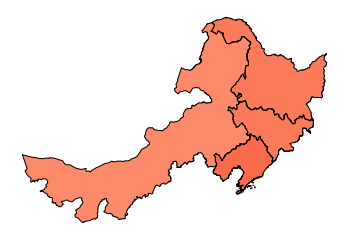

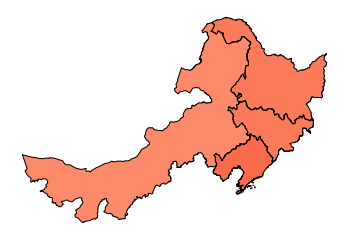

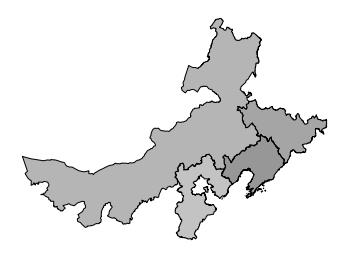

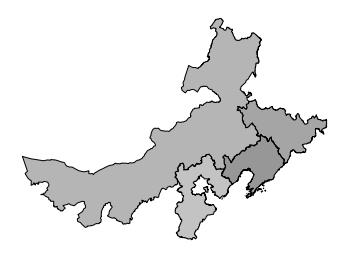

In [45]:
for i in range(2):   
    df_now= pd.concat( [pd.DataFrame(df_used_name.values[i]), pd.DataFrame(df_used_EnglishName.values[i]), pd.DataFrame(df_used_number.values[i])], axis=1 )
    df_now.columns = ['provinceName', 'provinceEnglishName','number']# set the column
    data_with_geometry = pd.merge(left=df_now,
                              right=china,
                              left_on='provinceName',
                              right_on='OWNER',
                              how='left'
                              ).loc[:, ['provinceName',
                                        'provinceEnglishName',
                                        'number',
                                        'geometry'
                                        ]]
    data_with_geometry = gpd.GeoDataFrame(data_with_geometry, crs='EPSG:4326')
    
    splits = 1000# number of individual colours to use in full version 
    halfway = int(splits/2)# number of individual colours to use in truncated version

    if(i%6==0): #Cycle through colors
        colour_values = mpl.cm.Reds(np.linspace(0, 1, splits))# list of rgb colours for full version. Returns num evenly spaced samples, calculated over the interval [start, stop]
    elif(i%6==1):
        colour_values = mpl.cm.Greys(np.linspace(0, 1, splits))
    elif(i%6==2):
        colour_values = mpl.cm.Purples(np.linspace(0, 1, splits))
    elif(i%6==3):
        colour_values = mpl.cm.Blues(np.linspace(0, 1, splits))
    elif(i%6==4):
        colour_values = mpl.cm.Greens(np.linspace(0, 1, splits))
    elif(i%6==5):
        colour_values = mpl.cm.Oranges(np.linspace(0, 1, splits))
        
    trunc_colours = colour_values[0:halfway,:] # row 0 to halfway
    trunc_cmap = mpl.colors.ListedColormap(trunc_colours)
    full_colours = colour_values[:,:] # all rows, all columns
    full_cmap = mpl.colors.ListedColormap(full_colours)
    
    getFigure_narrow()
    getFigure_full()
    

In [23]:
splits = 1000 # number of individual colours to use in full version 
halfway = int(splits/2) # number of individual colours to use in truncated version
colour_values = mpl.cm.Reds(np.linspace(0, 1, splits)) # list of rgb colours for full version
# np.linspace: Return evenly spaced numbers over a specified interval (in this case 0 - 1)
trunc_colours = colour_values[0:halfway,:] # row 0 to halfway
trunc_cmap = mpl.colors.ListedColormap(trunc_colours)
full_colours = colour_values[:,:] # all rows, all columns
full_cmap = mpl.colors.ListedColormap(full_colours)

(-767596.3704460642, 2219268.8377635987, 3798020.54922555, 5971679.093126878)

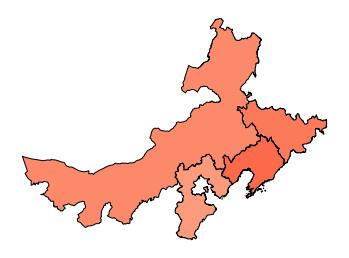

In [32]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='number',
                                                 cmap=trunc_cmap,
                                                 edgecolor='black',
                                                 vmin=0,
                                                 #vmax=1000,
                                                 #legend=True
                                                 
                                                 
                                                 )

ax.plot()
#pic2=ax2.imshow(img,cmap=trunc_cmap,vmin=0,vmax=1000)#随意控制colorbar的范围
ax.axis('off')
#fig.colorbar(pic2,ax=ax,orientation='horizontal')#把ax2的colorbar画在ax上

In [44]:
def getFigure_narrow():
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='number',
                                                 cmap=trunc_cmap,
                                                 edgecolor='black',
                                                 vmin=0,
                                                 #vmax=1000,
                                                 #legend=True                                        
                                                 )

    ax.plot()
    #pic2=ax2.imshow(img,cmap=trunc_cmap,vmin=0,vmax=1000)#随意控制colorbar的范围
    ax.axis('off')
    figure_name=str(i+1)+"_narrow.png"# set figure name 
    plt.savefig(figure_name, dpi=500)
    #fig.colorbar(pic2,ax=ax,orientation='horizontal')#把ax2的colorbar画在ax上

In [40]:
def getFigure_full():
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='number',
                                                 cmap=trunc_cmap,
                                                 edgecolor='black',
                                                 vmin=0,
                                                 #vmax=1000,
                                                 #legend=True                                        
                                                 )

    ax.plot()
    #pic2=ax2.imshow(img,cmap=trunc_cmap,vmin=0,vmax=1000)#随意控制colorbar的范围
    ax.axis('off')
    figure_name=str(i+1)+"_full.png"# set figure name 
    plt.savefig(figure_name, dpi=500)
    #fig.colorbar(pic2,ax=ax,orientation='horizontal')#把ax2的colorbar画在ax上